In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder


In [3]:
df_pen= pd.read_csv("penguin_population.csv")

In [4]:
df_pen.head()

,site.name,site.id,ccamlr.region,Longitude.EPSG.4326,Latitude.EPSG.4326,common.name,day,month,year,season.starting,count,accuracy,count.type
0,Adams Island,ADAM,58.4.1,92.5486,-66.5459,adelie penguin,12,11,2009,2009,76,5,nests
1,Adams Island,ADAM,58.4.1,92.5486,-66.5459,adelie penguin,21,1,2011,2010,425,1,adults
2,Cape Adare,ADAR,88.1,170.1999,-71.3063,adelie penguin,0,0,1982,1982,220900,2,chicks
3,Cape Adare,ADAR,88.1,170.1999,-71.3063,adelie penguin,0,12,1983,1983,256806,2,nests
4,Cape Adare,ADAR,88.1,170.1999,-71.3063,adelie penguin,0,12,1986,1986,282307,2,nests


In [5]:
df_pen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3478 entries, 0 to 3477
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   site.name            3478 non-null   object 
 1   site.id              3478 non-null   object 
 2   ccamlr.region        3478 non-null   object 
 3   Longitude.EPSG.4326  3478 non-null   float64
 4   Latitude.EPSG.4326   3478 non-null   float64
 5   common.name          3478 non-null   object 
 6   day                  3478 non-null   int64  
 7   month                3478 non-null   int64  
 8   year                 3478 non-null   int64  
 9   season.starting      3478 non-null   int64  
 10  count                3478 non-null   int64  
 11  accuracy             3478 non-null   int64  
 12  count.type           3478 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 353.4+ KB


In [6]:
df_pen.describe()

,Longitude.EPSG.4326,Latitude.EPSG.4326,day,month,year,season.starting,count,accuracy
count,3478.000000,3478.00000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000,3478.000000
mean,-8.767666,-66.26713,9.745543,5.130247,1999.029902,1998.685164,7719.775158,1.724554
std,88.981966,4.59227,10.276922,5.417618,13.372658,13.308190,27327.127469,1.208031
min,-157.700000,-77.77000,0.000000,0.000000,1895.000000,1895.000000,0.000000,0.000000
25%,-62.866700,-67.86470,0.000000,0.000000,1987.000000,1987.000000,250.000000,1.000000
50%,-58.933000,-64.81490,6.000000,2.000000,2002.000000,2002.000000,1060.000000,1.000000
75%,39.463500,-62.77840,18.000000,12.000000,2010.000000,2010.000000,3442.250000,2.000000
max,171.169200,-60.53330,31.000000,12.000000,2017.000000,2016.000000,428516.000000,5.000000


In [7]:
df_pen["common.name"].value_counts()

adelie penguin       1405
gentoo penguin        933
chinstrap penguin     907
emperor penguin       233
Name: common.name, dtype: int64

In [8]:
df_pen.loc[0:20]

,site.name,site.id,ccamlr.region,Longitude.EPSG.4326,Latitude.EPSG.4326,common.name,day,month,year,season.starting,count,accuracy,count.type
0,Adams Island,ADAM,58.4.1,92.5486,-66.5459,adelie penguin,12,11,2009,2009,76,5,nests
1,Adams Island,ADAM,58.4.1,92.5486,-66.5459,adelie penguin,21,1,2011,2010,425,1,adults
2,Cape Adare,ADAR,88.1,170.1999,-71.3063,adelie penguin,0,0,1982,1982,220900,2,chicks
3,Cape Adare,ADAR,88.1,170.1999,-71.3063,adelie penguin,0,12,1983,1983,256806,2,nests
4,Cape Adare,ADAR,88.1,170.1999,-71.3063,adelie penguin,0,12,1986,1986,282307,2,nests
5,Cape Adare,ADAR,88.1,170.1999,-71.3063,adelie penguin,0,12,1988,1988,272338,2,nests
6,Cape Adare,ADAR,88.1,170.1999,-71.3063,adelie penguin,0,12,1990,1990,169200,2,nests
7,Cape Adare,ADAR,88.1,170.1999,-71.3063,adelie penguin,0,12,1992,1992,297443,2,nests
8,Cape Adare,ADAR,88.1,170.1999,-71.3063,adelie penguin,0,12,1998,1998,338777,2,nests
9,Cape Adare,ADAR,88.1,170.1999,-71.3063,adelie penguin,16,2,2011,2010,338231,5,nests


In [9]:
df_grouped = df_pen.groupby(['year', 'common.name']).agg({'count': 'sum'}).reset_index()
df_grouped.rename(columns={'year':'Year'}, inplace=True)

In [10]:
print(df_grouped)

     Year        common.name  count
0    1895     gentoo penguin     40
1    1903  chinstrap penguin  25000
2    1903     gentoo penguin      0
3    1908  chinstrap penguin      0
4    1922  chinstrap penguin      0
..    ...                ...    ...
183  2016     adelie penguin   6919
184  2016  chinstrap penguin  40836
185  2016     gentoo penguin  41535
186  2017     adelie penguin  18415
187  2017  chinstrap penguin  14100

[188 rows x 3 columns]


In [12]:
le = LabelEncoder()
df_grouped['common_name_encoded'] = le.fit_transform(df_grouped['common.name'])



In [13]:
df_sea_ice = pd.read_csv("sea_ice_extent.csv")

In [14]:
df_sea_ice.head()

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
0,1978,10,26,10.231,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
1,1978,10,28,10.420,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
2,1978,10,30,10.557,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
3,1978,11,1,10.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
4,1978,11,3,10.777,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north


In [15]:
df_sea_ice.columns = df_sea_ice.columns.str.strip()  # Boşlukları temizle


In [16]:
df_sea_ice.drop(['Missing', 'Source Data'], axis=1, inplace=True)

In [17]:
df_sea_ice = df_sea_ice.groupby(['Year', 'Month', 'hemisphere'])['Extent'].mean().reset_index()
df_sea_ice = df_sea_ice.groupby(['Year', 'hemisphere'])['Extent'].mean().reset_index()


In [18]:
df_sea_ice.head()

,Year,hemisphere,Extent
0,1978,north,11.904954
1,1978,south,14.663550
2,1979,north,12.349634
3,1979,south,11.653819
4,1980,north,12.349545


In [19]:
df_sea_ice= df_sea_ice[df_sea_ice['hemisphere'] == 'south']

In [20]:
df_sea_ice

,Year,hemisphere,Extent
1,1978,south,14.663550
3,1979,south,11.653819
5,1980,south,11.205945
7,1981,south,11.387509
9,1982,south,11.594156
11,1983,south,11.343462
13,1984,south,11.428566
15,1985,south,11.569727
17,1986,south,11.043747
19,1987,south,11.663671


In [21]:
type(df_sea_ice)

pandas.core.frame.DataFrame

In [22]:
merged_df = pd.merge(df_sea_ice, df_grouped, on='Year', how='left')
merged_df.head()


,Year,hemisphere,Extent,common.name,count,common_name_encoded
0,1978,south,14.663550,adelie penguin,70828.0,0.0
1,1978,south,14.663550,chinstrap penguin,84425.0,1.0
2,1978,south,14.663550,emperor penguin,11165.0,2.0
3,1979,south,11.653819,adelie penguin,184855.0,0.0
4,1979,south,11.653819,chinstrap penguin,34257.0,1.0


In [23]:
merged_df.describe()

,Year,Extent,count,common_name_encoded
count,145.000000,145.000000,1.430000e+02,143.000000
mean,1997.517241,11.641430,1.833857e+05,1.426573
std,11.629168,0.805225,3.369143e+05,1.159708
min,1978.000000,4.839170,3.100000e+01,0.000000
25%,1987.000000,11.379159,1.370350e+04,0.000000
50%,1998.000000,11.628244,3.729900e+04,1.000000
75%,2007.000000,11.748206,2.064355e+05,3.000000
max,2019.000000,14.663550,2.403432e+06,3.000000


In [24]:
import seaborn as sbn

In [34]:
df_2000_and_later = merged_df.loc[merged_df['Year'] >= 2000]


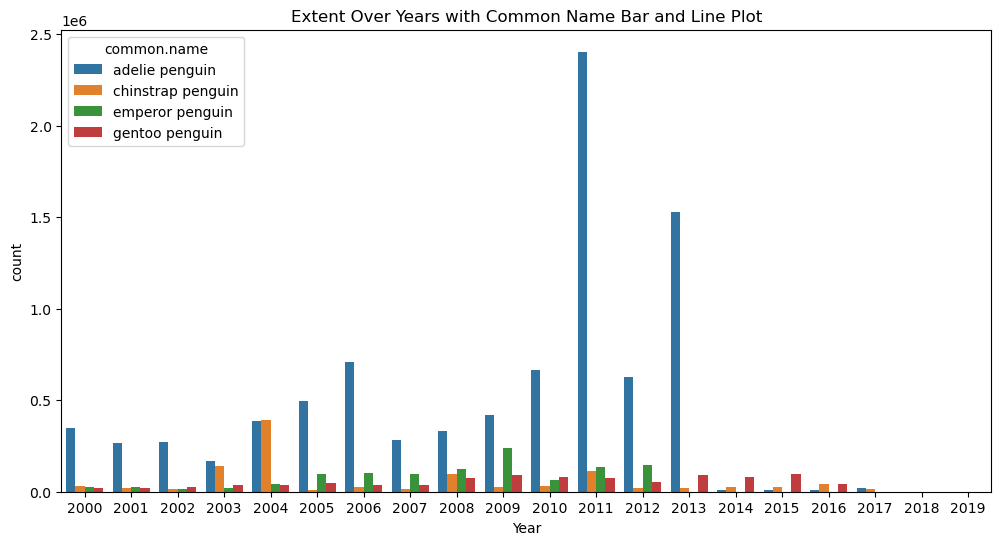

In [43]:
plt.figure(figsize=(12, 6))
sbn.barplot(data=df_2000_and_later, x='Year', y='count', hue='common.name')


plt.title('Extent Over Years with Common Name Bar and Line Plot')
plt.show()

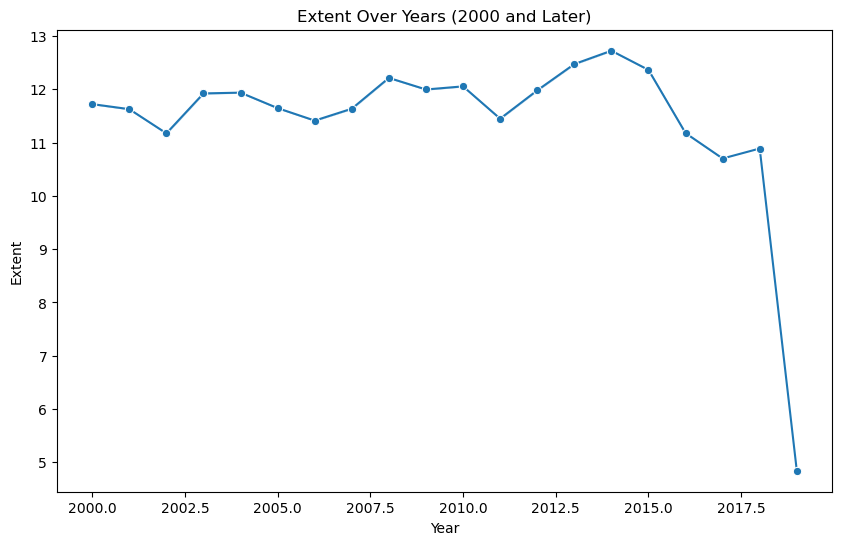

In [40]:
plt.figure(figsize=(10, 6))
sbn.lineplot(data=df_2000_and_later, x='Year', y='Extent', marker='o')

plt.title('Extent Over Years (2000 and Later)')
plt.xlabel('Year')
plt.ylabel('Extent')
plt.show()

In [45]:
df_emperor_penguin = merged_df.loc[(merged_df['Year'] >= 2000) & (merged_df['common.name'] == 'emperor penguin')]


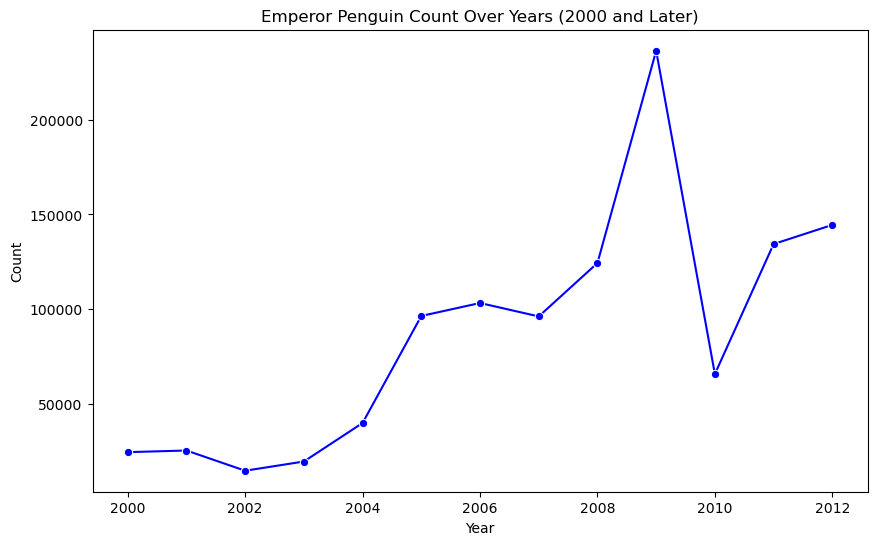

In [50]:
plt.figure(figsize=(10, 6))
#sbn.barplot(data=df_emperor_penguin, x='Year', y='count', color='blue')
sbn.lineplot(data=df_emperor_penguin, x='Year', y='count', color='blue',marker="o")

plt.title('Emperor Penguin Count Over Years (2000 and Later)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

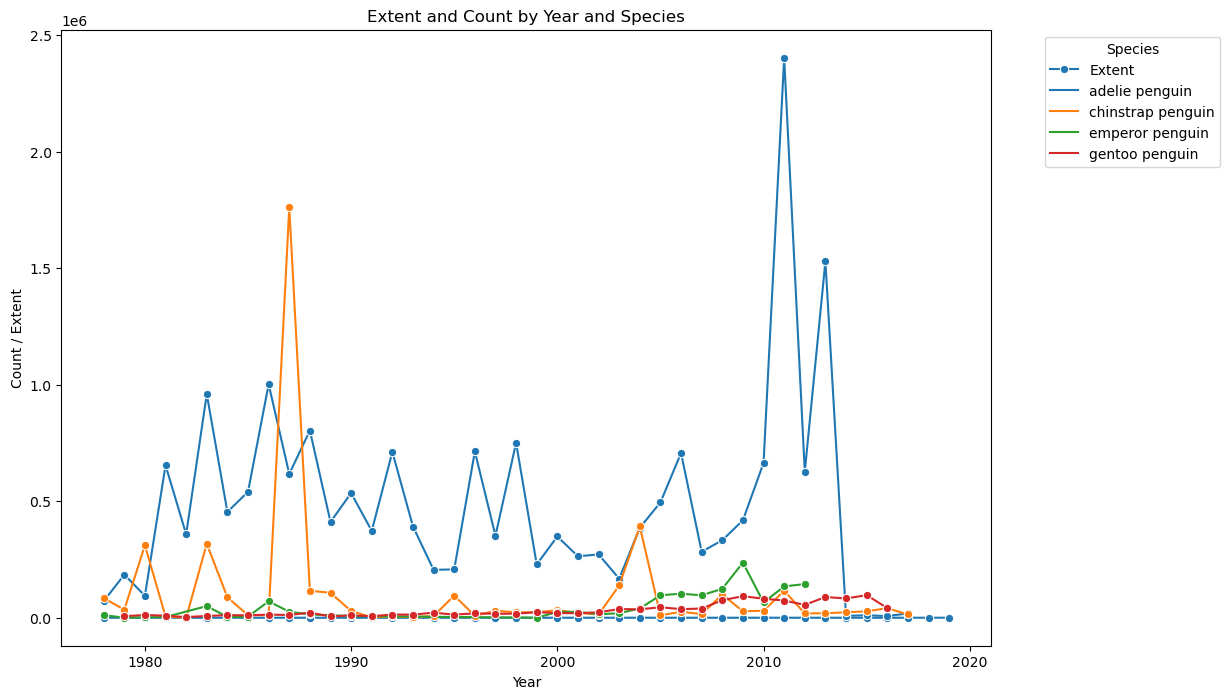

In [40]:
plt.figure(figsize=(12, 8))

# Yıllara göre extent değerini çizgiyle gösterin
sbn.lineplot(x='Year', y='Extent', data=merged_df, label='Extent', marker='o')

# Her penguin türü ve yıla göre count değerlerini çizgilerle gösterin
sbn.lineplot(x='Year', y='count', hue='common.name', data=merged_df, marker='o')

# Grafiği düzenle
plt.xlabel('Year')
plt.ylabel('Count / Extent')
plt.title('Extent and Count by Year and Species')
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()